连续性感知器  
非线性模型  
### 前向反馈
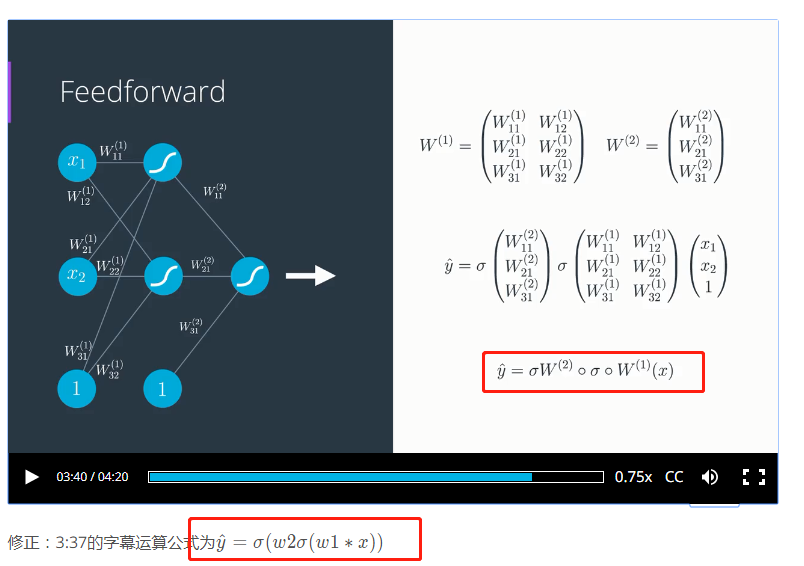

#### 误差函数
表示每个点分类错误的程度有多大（点到直线的距离）  

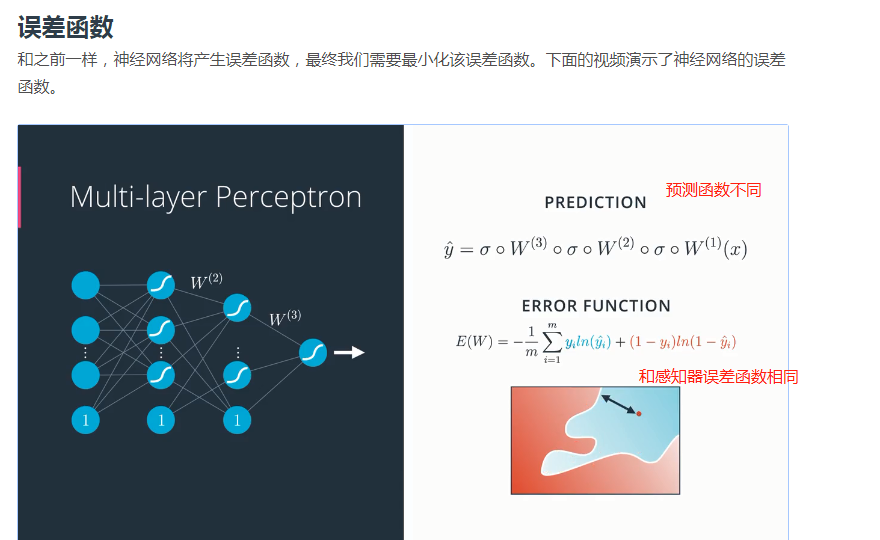

### 反向传播  
现在，我们准备好训练神经网络了。为此，我们将使用一种方法，叫做反向传播。简而言之，反向传播将包括：

- 进行前向反馈运算。
- 将模型的输出与期望的输出进行比较。
- 计算误差。
- 向后运行前向反馈运算（反向传播），将误差分散到每个权重上。
- 更新权重，并获得更好的模型。
- 继续此流程，直到获得很好的模型。

**感知器**
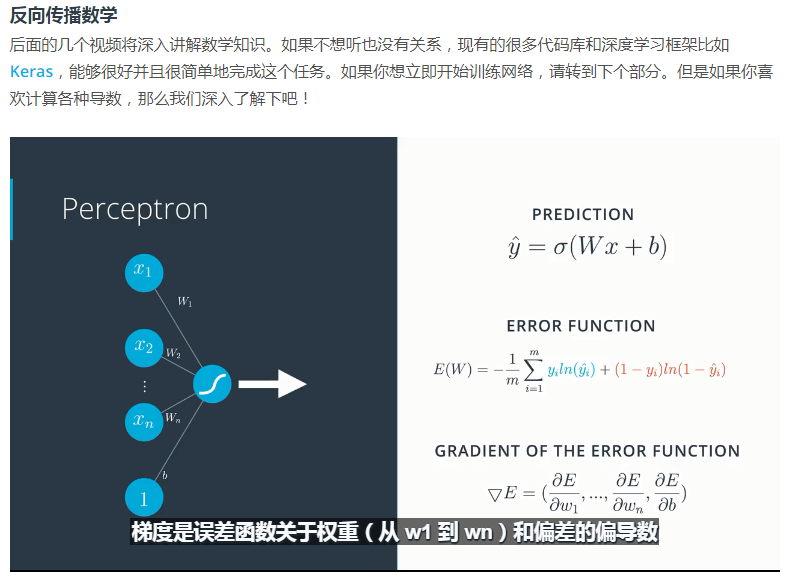

**多层感知器**
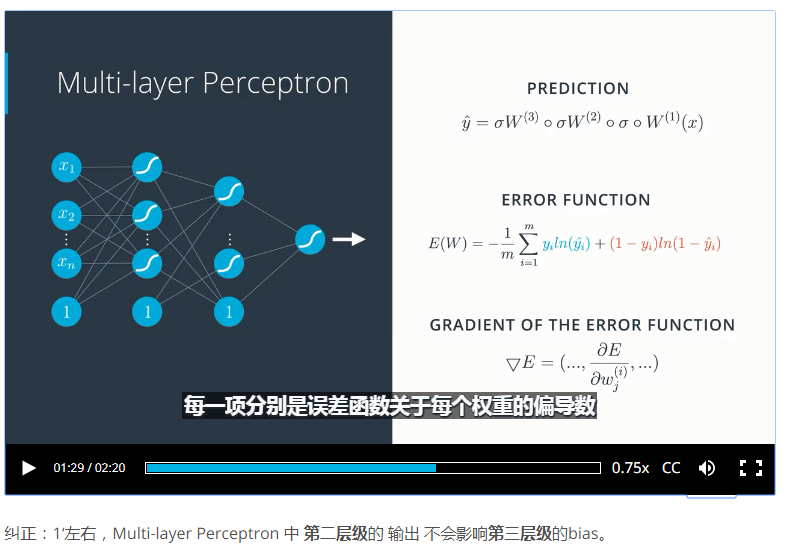

**反向传播**
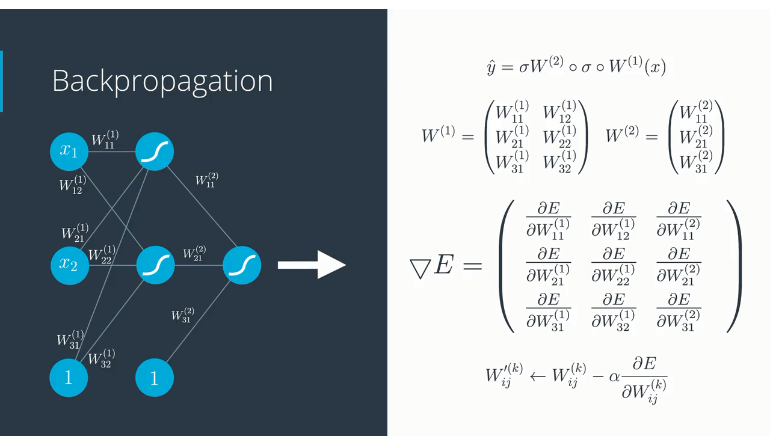

> 梯度是误差函数关于权重（W1到Wn)和偏差的偏导数形成的向量。

### 用 Keras 构建神经网络
使用神经网络时，都不需要编写激活函数、梯度下降等。有很多包可以帮助我们，建议你了解这些包，包括以下包：
- Keras
- TensorFlow
- Caffe
- Theano
- Scikit-learn
以及很多其他包！

```
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
# Using TensorFlow 1.0.0; use tf.python_io in later versions
tf.python.control_flow_ops = tf

# Set random seed
np.random.seed(42)

# Our data
X = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
# One-hot encoding the output
y = np_utils.to_categorical(y)

# Building the model 创建序列模型
xor = Sequential()

# Add required layers
#第一层 - 添加有128个节点的全连接层以及32个节点的输入层
xor.add(Dense(64, input_dim=2))
#第二层 - 添加 softmax 激活层
xor.add(Activation('relu'))
#第三层 - 添加全连接层
xor.add(Dense(2))
#第四层 - 添加 Sigmoid 激活层
xor.add(Activation('sigmoid'))
-------------------------------------
>Keras 将根据第一层自动推断后续所有层的形状。这意味着，你只需为第一层设置输入维度。
上面的第一层 model.add(Dense(input_dim=32)) 将维度设为 32（表示数据来自 32 维空间）。第二层级获取第一层级的输出，并将输出维度设为 128 个节点。这种将输出传递给下一层级的链继续下去，直到最后一个层级（即模型的输出）。可以看出输出维度是 10。

构建好模型后，我们就可以用以下命令对其进行编译。我们将损失函数指定为我们一直处理的 categorical_crossentropy。我们还可以指定优化程序，稍后我们将了解这一概念，暂时将使用 adam。最后，我们可以指定评估模型用到的指标。我们将使用准确率。  
-----------------------------------------

# Specify loss as "binary_crossentropy", optimizer as "adam",
# and add the accuracy metric
xor.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

# Uncomment this line to print the model architecture
#我们可以使用以下命令来查看模型架构：
# xor.summary()

# Fitting the model
---------------------
使用以下命令对其进行拟合，指定 epoch 次数和我们希望在屏幕上显示的信息详细程度。

然后使用fit命令训练模型并通过 epoch 参数来指定训练轮数（周期），每 epoch 完成对整数据集的一次遍历。 verbose 参数可以指定显示训练过程信息类型，这里定义为 0 表示不显示信息。
------------------------------------
history = xor.fit(X, y, nb_epoch=1000, verbose=0)

---------------------
注意：在 Keras 1 中，nb_epoch 会设置 epoch 次数，但是在 Keras 2 中，变成了 epochs。

最后，我们可以使用以下命令来评估模型：
-----------------
# Scoring the model
score = xor.evaluate(X, y)
print("\nAccuracy: ", score[-1])

# Checking the predictions
print("\nPredictions:")
print(xor.predict_proba(X))

```

### 正则化
- 如何避免过度拟合的发生？是因为错误模型的误差结果更小，提供了错误的模型，对误差函数稍作调整。那就要惩罚高系数，对原来的误差函数增加一项
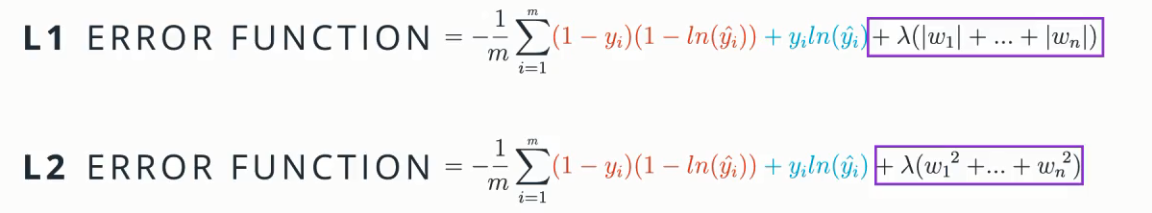

参数$\lambda $ 指惩罚系数的多少。$\lambda $ 小，指不需要惩罚很严重。$\lambda $ 大，需要惩罚严重。  
关于选用L1和L2,通用规则：  
L1: 希望得到稀疏向量，较小权重，权重趋于0。
L2:不支持稀疏向量，确保所有权重一致较小。  


### 激活函数  
神经网络中，套在线性变换外面的函数称为激活函数。  
激活函数有线性和非线性之分。  
- 双曲正切Hyperbolic Tangent:  
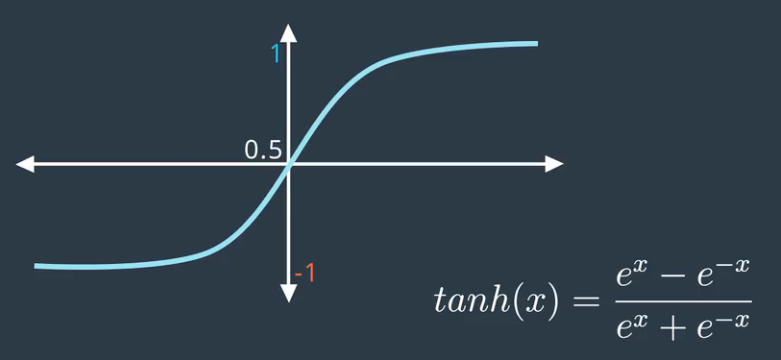
- relu:  
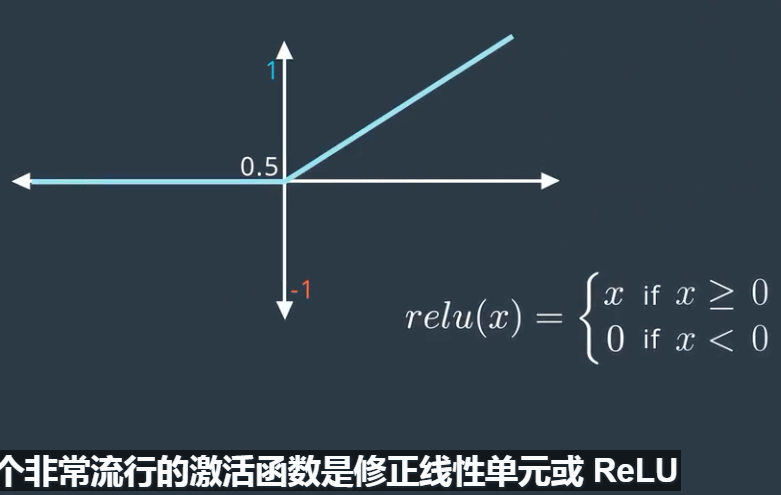

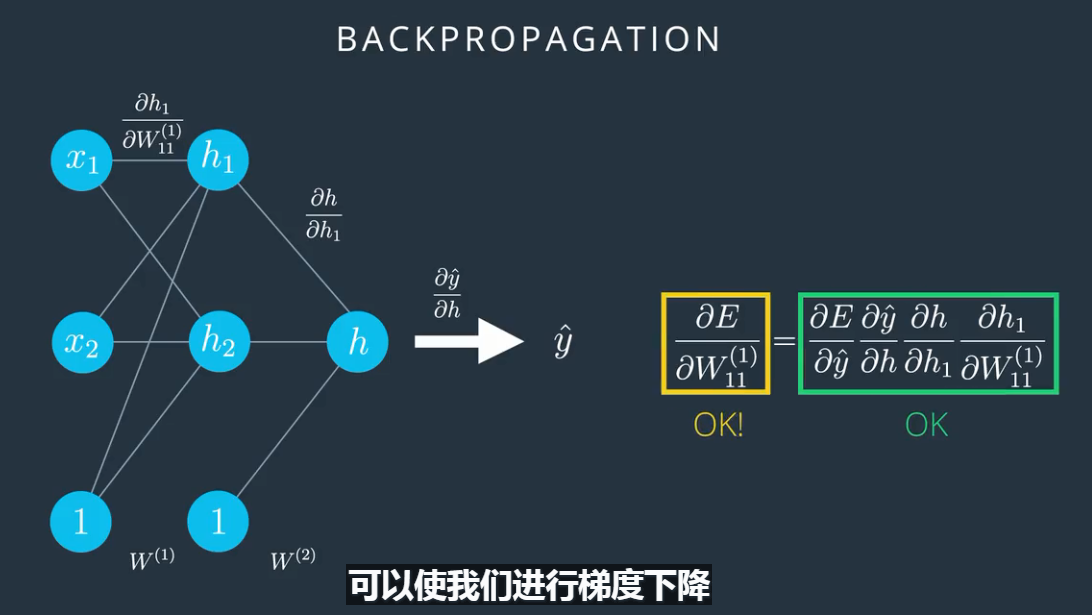

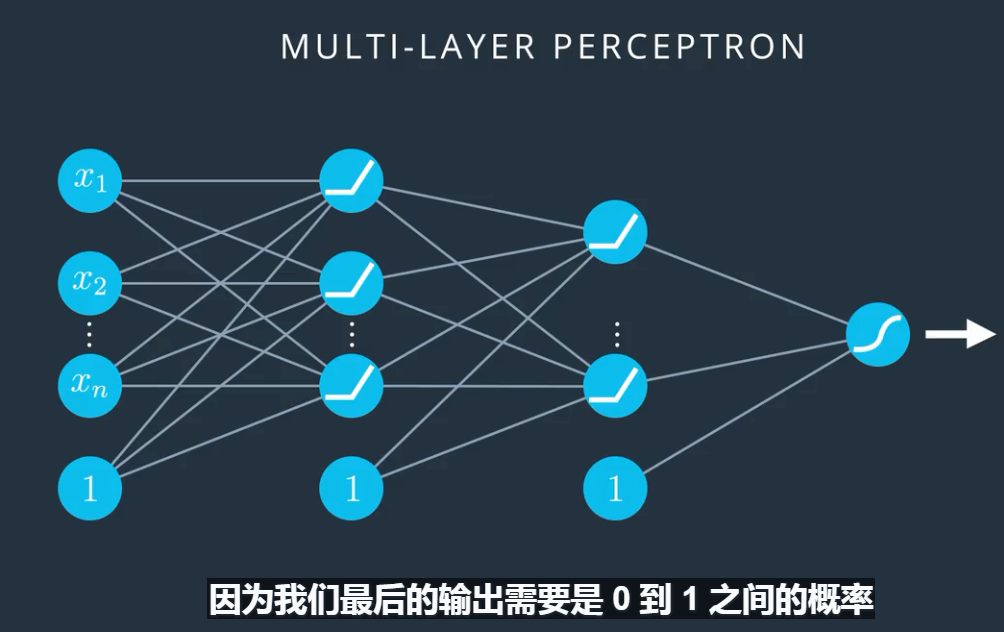
最后一层使用sigmoid函数,最后的输出在0-1之间的概率

### 关于寻找梯度下降最低点问题
Keras 优化程序
Keras 中有很多优化程序，建议你访问此[链接](https://keras.io/optimizers/)或这篇精彩[博文](http://ruder.io/optimizing-gradient-descent/index.html#rmsprop)（此链接来自外网，国内网络可能打不开），详细了解这些优化程序。这些优化程序结合使用了上述技巧，以及其他一些技巧。最常见的包括：

SGD
这是随机梯度下降。它使用了以下参数：

学习速率。
动量（获取前几步的加权平均值，以便获得动量而不至于陷在局部最低点）。
Nesterov 动量（当最接近解决方案时，它会减缓梯度）。
Adam
Adam (Adaptive Moment Estimation) 使用更复杂的指数衰减，不仅仅会考虑平均值（第一个动量），并且会考虑前几步的方差（第二个动量）。

RMSProp
RMSProp (RMS 表示均方根误差）通过除以按指数衰减的平方梯度均值来减小学习速率。